## Computer vision 2022 Assignment 3: Deep Learning for Perception Tasks

This assignment contains 2 questions. The first question gives you a basic understanding of the classifier. The second question requires you to write a simple proposal.

# Question 1: A simple classifier (60%)

For this exercise, we will provide a demo code showing how to train a network on a small dataset called FashionMinst. Please go through the following tutorials first. You will get a basic understanding about how to train an image classification network in pytorch. You can change the training scheme and the network structure. Please answer the following questions then. You can orginaze your own text and code cell to show the answer of each questions.


Note: Please plot the loss curve for each experiment (2 point).


Requirement:

Q1.1 (1 point) Change the learning rate and train for 10 epochs. Fill this table:

|Lr|Accuracy|
|---|---|
|1   |  19.9%    |
|0.1|    88.0%      |
|0.01|     83.3%    |
|0.001  |   71.1%     |


Q1.2 (2 point) Report the number of epochs when the network is converged. 
Hint: The network is called "converged" when the accuracy is not changed (or the change is smaller than a threshold).

Fill this table:

|Lr|Accuracy|Epoch|
|---|---|---|
|1   |  20%    |   6  |
|0.1|    88.1%      |  16  |
|0.01|    87.9%     |  47  |
|0.001  |    82.9%    | 52    |


Q1.3 (2 points) Compare the results in table 1 and table 2, what is your observation and your understanding of learning rate?


In table one we can see the best performing learning rate is 0.1. There is a happy medium between a learning rate that is either to high or to low. Table two shows that as the learning rate decreases, the amount of epochs required for the model to converge increases. This suggests that a lower learning rate means the model will learn the values for the weights slower.


Q1.4 (3 point) Build a deeper/ wider network. Report the accuracy and the parameters for each structure. Parameters represent the number of trainable parameters in your model, e.g. a 3 x 3 conv has 9 parameters.

learning_rate = 0.1

epochs = 30

|Structures|Accuracy|Parameters|
|---|---|---|
|Base   |   87.9%   | 669,706|
|Deeper|     88.3%     |579,210|
|Wider|     88.7%    | 861,706|

REFER TO SECTION 1.4 FURTHER DOWN FOR THE BASE, DEEPER AND WIDER IMPLEMENTATIONS


Q1.5 (2 points) Choose to do one of the following two tasks:

a. Write a code to calculate the parameter and explain the code.

OR

b. Write done the process of how to calculate the parameters by hand. 

REFER TO SECTION 1.5 FURTHER DOWN FOR PART B OF THIS QUESTION


Q1.6 (1 points) What are your observations and conclusions for changing network structure?

We can see that the wider network provides greater accuracy than the base and deeper networks. We can see that the wider architecture has more trainable
parameters which may be a contributing factor to this increase in accuracy.


Q1.7 (2 points) Calculate the mean of the gradients of the loss to all trainable parameters. Plot the gradients curve for the first 100 training steps. What are your observations? Note that this gradients will be saved with the training weight automatically after you call loss.backwards(). Hint: the mean of the gradients should be decreased.

For more exlanation of q1.7, you could refer to the following simple instructions: https://colab.research.google.com/drive/1XAsyNegGSvMf3_B6MrsXht7-fHqtJ7OW?usp=sharing

In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display
%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read  Train and Test data

In [12]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

# Q1.4 Definition of Base, Deeper and Wider Networks

In [90]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
# print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Define deeper network
class DeeperNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeeperNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
# Define wider network
class WiderNeuralNetwork(nn.Module):
    def __init__(self):
        super(WiderNeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512+100),
            nn.ReLU(),
            nn.Linear(512+100, 512+100),
            nn.ReLU(),
            nn.Linear(512+100, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [86]:
mean_gradients = []

# Define a train function
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
        
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()        
        
        # ***************** Q1.7 - Calculate mean gradients *****************
        grad = 0     
        for params in model.parameters():
            grad += params.grad.mean()
        mean_gradients.append(grad / 3)
        
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [25]:
# Define a test function
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return test_loss

In [89]:
# Train and test the model
learning_rates = [1, 0.1, 0.01, 0.001]

epochs = 30
learning_rates = [0.1]

for lr in learning_rates:
    losses = []
    
    model = WiderNeuralNetwork().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for t in range(epochs): 
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer)
        losses.append( round(test(test_dataloader, model, loss_fn), 3) )
    print(losses)

# Loss Graphs

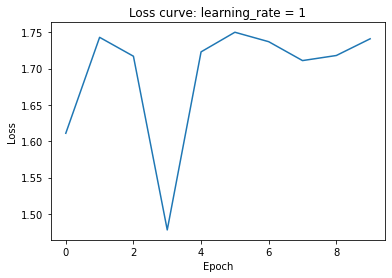

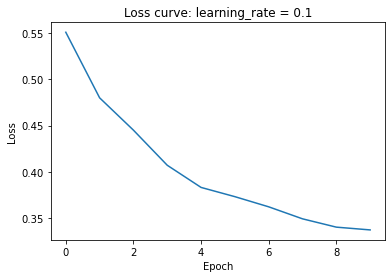

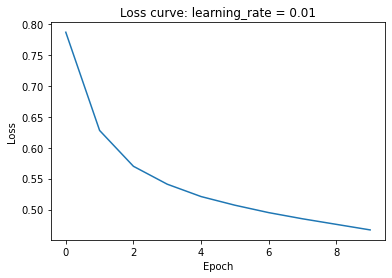

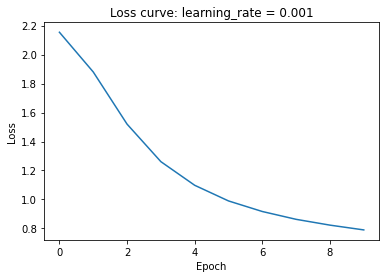

In [111]:
# Q1.1

loss1 = [1.611, 1.743, 1.717, 1.478, 1.723, 1.750, 1.737, 1.711, 1.718, 1.741]
plt.plot(loss1)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve: learning_rate = 1")
plt.show()

loss2 = [0.551, 0.480, 0.445, 0.407, 0.383, 0.373, 0.362, 0.349, 0.340, 0.337]
plt.plot(loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve: learning_rate = 0.1")
plt.show()

loss3 = [0.787, 0.628, 0.570, 0.541, 0.521, 0.507, 0.495, 0.485, 0.476, 0.467]
plt.plot(loss3)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve: learning_rate = 0.01")
plt.show()

loss4 = [2.154, 1.880, 1.520, 1.261, 1.098, 0.990, 0.917, 0.863, 0.823, 0.790]
plt.plot(loss4)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve: learning_rate = 0.001")
plt.show()

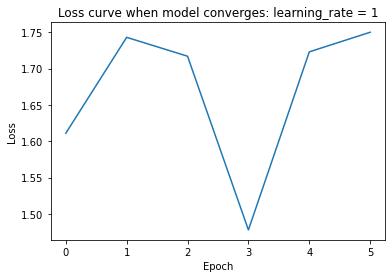

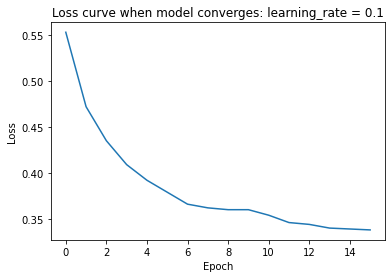

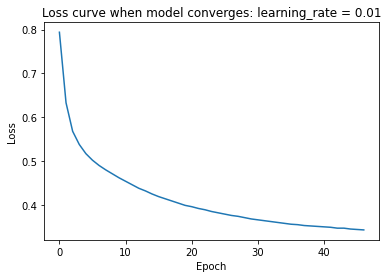

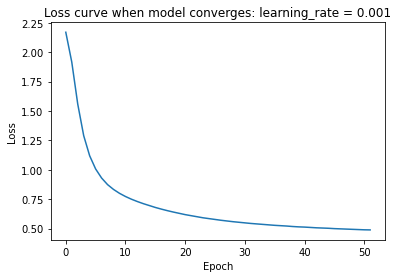

In [112]:
# Q1.2
loss1 = [1.611, 1.743, 1.717, 1.478, 1.723, 1.750]
plt.plot(loss1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve when model converges: learning_rate = 1")
plt.show()

loss2 = [0.553, 0.472, 0.435, 0.409, 0.392, 0.379, 0.366, 0.362, 0.36, 0.36, 0.354, 0.346, 0.344, 0.34, 0.339, 0.338]
plt.plot(loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve when model converges: learning_rate = 0.1")
plt.show()

loss3 = [0.794, 0.633, 0.568, 0.538, 0.517, 0.502, 0.49, 0.48, 0.471, 0.462, 0.454, 0.446, 0.438, 0.432, 0.425, 0.419, 0.414, 0.409, 0.404, 0.399, 0.396, 0.392, 0.389, 0.385, 0.382, 0.379, 0.376, 0.374, 0.371, 0.368, 0.366, 0.364, 0.362, 0.36, 0.358, 0.356, 0.355, 0.353, 0.352, 0.351, 0.35, 0.349, 0.347, 0.347, 0.345, 0.344, 0.343]
plt.plot(loss3)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve when model converges: learning_rate = 0.01")
plt.show()

loss4 = [2.169, 1.916, 1.559, 1.29, 1.119, 1.007, 0.93, 0.874, 0.833, 0.8, 0.773, 0.75, 0.73, 0.712, 0.696, 0.68, 0.666, 0.653, 0.641, 0.63, 0.619, 0.61, 0.601, 0.592, 0.585, 0.578, 0.571, 0.565, 0.559, 0.554, 0.549, 0.544, 0.54, 0.536, 0.532, 0.528, 0.525, 0.522, 0.518, 0.515, 0.513, 0.51, 0.507, 0.505, 0.503, 0.5, 0.498, 0.496, 0.494, 0.492, 0.49, 0.489]
plt.plot(loss4)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve when model converges: learning_rate = 0.001")
plt.show()

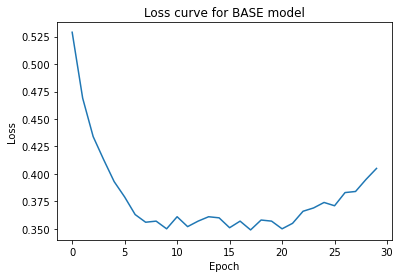

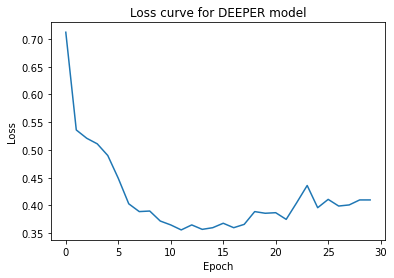

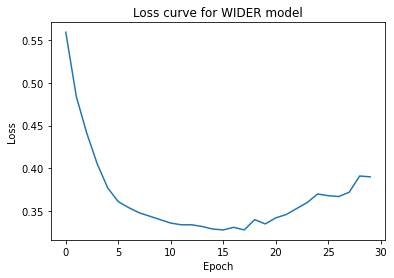

In [113]:
# Q1.4
loss1 = [0.529, 0.469, 0.434, 0.413, 0.393, 0.379, 0.363, 0.356, 0.357, 0.35, 0.361, 0.352, 0.357, 0.361, 0.36, 0.351, 0.357, 0.349, 0.358, 0.357, 0.35, 0.355, 0.366, 0.369, 0.374, 0.371, 0.383, 0.384, 0.395, 0.405]
plt.plot(loss1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve for BASE model")
plt.show()

loss2 = [0.712, 0.536, 0.521, 0.511, 0.49, 0.449, 0.403, 0.389, 0.39, 0.372, 0.365, 0.356, 0.365, 0.357, 0.36, 0.368, 0.36, 0.366, 0.389, 0.386, 0.387, 0.375, 0.405, 0.436, 0.396, 0.411, 0.399, 0.401, 0.41, 0.41]
plt.plot(loss2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve for DEEPER model")
plt.show()

loss3 = [0.559, 0.484, 0.441, 0.405, 0.377, 0.361, 0.354, 0.348, 0.344, 0.34, 0.336, 0.334, 0.334, 0.332, 0.329, 0.328, 0.331, 0.328, 0.34, 0.335, 0.342, 0.346, 0.353, 0.36, 0.37, 0.368, 0.367, 0.372, 0.391, 0.39]
plt.plot(loss3)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss curve for WIDER model")
plt.show()

# Q1.5 Calculate Parameters

In [ ]:
"""
num_parms = output_channel_number * (input_channel_number + 1)

Calculate Base Parameters 
    nn.Flatten(),               num_params = 0
    nn.Linear(28*28, 512),      num_params = 512 * (28*28 + 1) = 401,920
    nn.ReLU(),                  num_params = 0
    nn.Linear(512, 512),        num_params = 512 * (512 + 1)   = 262,656
    nn.ReLU(),                  num_params = 0
    nn.Linear(512, 10)          num_params = 10 * (512 + 1)    = 5,130
    
    Total Params: 669,706
            
    
Calculate Deeper Parameters 
    nn.Flatten(),               num_params = 0
    nn.Linear(28*28, 512),      num_params = 512 * (28*28 + 1) = 401,920
    nn.ReLU(),                  num_params = 0
    nn.Linear(512, 256),        num_params = 256 * (512 + 1)   = 131,328
    nn.ReLU(),                  num_params = 0
    nn.Linear(256, 128),        num_params = 128 * (256 + 1)   = 32,896
    nn.ReLU(),                  num_params = 0
    nn.Linear(128, 64),         num_params = 64 * (128 + 1)    = 8,256
    nn.ReLU(),                  num_params = 0
    nn.Linear(64, 64),          num_params = 64 * (64 + 1)     = 4,160
    nn.ReLU(),                  num_params = 0
    nn.Linear(64, 10)           num_params = 10 * (64 + 1)     = 650
    
    Total Params = 579,210
    
Calculate Wider Parameters 
    nn.Flatten(),               num_params = 0
    nn.Linear(28*28, 512+100),  num_params = 612 * (28*28 + 1) = 480,420
    nn.ReLU(),                  num_params = 0
    nn.Linear(512+100, 512+100),num_params = 612 * (612 + 1)   = 375,156
    nn.ReLU(),                  num_params = 0
    nn.Linear(512+100, 10)      num_params = 10 * (612 + 1)    = 6,130
    
    Total Params = 861,706
    
"""

# Q1.7 Calculate Mean Of Loss Gradients

In [91]:
# Train and test the model
epochs = 2
learning_rates = [0.01]

for lr in learning_rates:
    
    model = NeuralNetwork().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    for t in range(epochs):    
        print(f"Epoch {t+1}\n-------------------------------")
        train(train_dataloader, model, loss_fn, optimizer) # Calculate gradient in train
        test(test_dataloader, model, loss_fn)

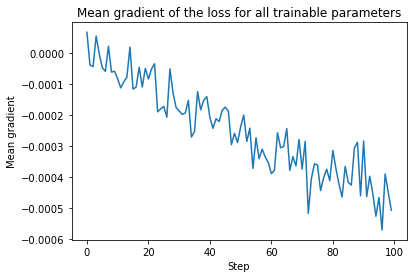

In [114]:
plt.plot(mean_gradients[:100]) # plotting by columns
plt.xlabel("Step")
plt.ylabel("Mean gradient")
plt.title("Mean gradient of the loss for all trainable parameters")
plt.show()

It is observed that the mean gradient of the loss for all trainable parameters is decreasing as the amount of steps increase. During training if the loss is decreasing it is also expected the mean gradient will decrease.

# Question 2: Proposal for Practical Applications (40%)
Look for a typical computer vision problem, such as:

a. removing noise on the image

b. increasing the resolution of the image

c. identifying objects in the image

d. segmenting the area to which the image belongs

e. estimating the depth of an object

f. estimating the motion of two object in different frames

h. others

Discuss possible applications of this problem in life, e.g. image editing systems in your phone, improved quality of the old film, sweeping robot avoiding obstacles, unlocks the face of the mobile phone, identifies the cancer area according to the medical scan image, determines the identity according to the face, identifies the trash can on the road, and the detection system tracks the target object, etc.

In this question, you need to do
1. Clearly define the problem and describe its application scenarios
2. Briefly describe a feasible solution based on image processing and traditional machine learning algorithms.
3. Briefly describe a feasible deep learning-based solution.
4. Compare the advantages and disadvantages of the two options.

Hint1: Submit an individua report for question 2.

Hint2: Well orginaze your report.

Hint3: You can draw flow chart or inculde other figures for better understanding of your solution.  

Please restrict your report within 800 words. In this question, you do not need to implement your solution. You only need to write down a proposal. Please submit this report in a seperate pdf. 

